# Import 

In [8]:
%load_ext watermark
%load_ext autoreload
%autoreload 2
#%matplotlib notebook 

from inktime import palette_plot, primaries, optical_density, transmission   
import imageio
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import pandas as pd
import colour

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
%watermark -a 'Frank Ligterink and Gauthier Patin' -d -t -v -p numpy,pandas,matplotlib,imageio,colour

Author: Frank Ligterink and Gauthier Patin

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

numpy     : 1.19.2
pandas    : 1.1.3
matplotlib: 3.3.2
imageio   : 2.9.0
colour    : 0.3.16



In [2]:
cd /home/gus/Documents/PhD/PhD_Projects/Part3_MFT_Application/3.4_MFT-external/3.4.9_Inktime_Frank/inktime/data/Processed/RS

/home/gus/Documents/PhD/PhD_Projects/Part3_MFT_Application/3.4_MFT-external/3.4.9_Inktime_Frank/inktime/data/Processed/RS


In [3]:
files = glob('*CAL02*')

df = pd.read_csv(files[1], header = [0,1])

In [5]:
df = df[df['patch']['value'] == 'Y11'] 
x = df['cum_hrs']['value']
y = df['dE00']['mean']
df[['L*','a*','b*']]

L*            a*           b*       
      mean    std   mean   std   mean    std
38   72.37  0.045  12.48  0.08  87.15  0.075
77   72.75  0.000  12.53  0.00  89.32  0.000
116  74.88  0.000  12.14  0.00  96.34  0.000
155  75.12  0.000  11.68  0.00  93.36  0.000
194  74.40  0.000  11.12  0.00  94.78  0.000
233  75.86  0.000   9.90  0.00  88.82  0.000
272  77.03  0.000  10.67  0.00  84.51  0.000
311  78.36  0.000   8.40  0.00  86.05  0.000
350  79.20  0.000   7.02  0.00  82.54  0.000

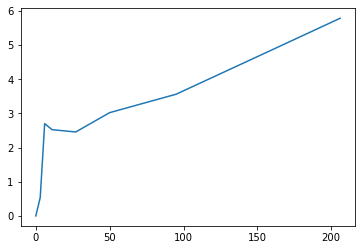

In [10]:
plt.plot(x,y)

In [ ]:
cd /home/gus/Documents/PhD/PhD_Projects/Part3_MFT_Application/3.4_MFT-external/3.4.9_Inktime_Frank/inktime/data/Processed/Photos

In [ ]:
im_file = 'crop_2022-01-27_CAL01_0hr.tif'
im = imageio.imread(im_file)[...,:3]

im = im[460:1610,800:3770]
im = im/ 255

fig, ax = plt.subplots(1,1, figsize = (15,6))

ax.imshow(im)

plt.show()

In [ ]:
im.shape

In [ ]:
palette_plot??

In [ ]:
palette_plot(im)

In [ ]:
M = primaries(im)
M

In [ ]:
M_inv = np.linalg.inv(M)
M_inv

In [ ]:
od_img = optical_density(im, normalize=False)

# temporarily flatten image into list 
img_shape = od_img.shape
od_list = od_img.reshape(-1, 3)

# matrix multiplication 
conc_list = od_list @ M_inv

# unflatten list into image 
concs_img = conc_list.reshape(img_shape)

# seperate images for cyan, magenta and yellow 
cyan_conc_img, magenta_conc_img, yellow_conc_img = concs_img.transpose(2, 0, 1)

In [ ]:
T_cyan = transmission(cyan_conc_img, M[0])
T_cyan = np.clip(T_cyan, a_min=0, a_max=1)

T_magenta = transmission(magenta_conc_img, M[1])
T_magenta = np.clip(T_magenta, a_min=0, a_max=1) 

T_yellow = transmission(yellow_conc_img, M[2])
T_yellow = np.clip(T_yellow, a_min=0, a_max=1)

fig, [ax0, ax1, ax2] = plt.subplots(ncols=3, figsize=[9, 3], sharex=True, sharey=True)

ax0.imshow(T_cyan)
ax0.set_title(f'Cyan layer')
ax1.imshow(T_magenta)
ax1.set_title('Magenta layer')
ax2.imshow(T_yellow);
ax2.set_title('Yellow layer');

In [ ]:
cyan_x_magenta_x_yellow = T_cyan * T_magenta * T_yellow 

fig, [ax0, ax1] = plt.subplots(ncols=2, figsize=[9, 5], sharex=True, sharey=True)

ax0.imshow(im)
ax1.imshow(cyan_x_magenta_x_yellow)

ax0.set_title('Original')
ax1.set_title('Reconstruction');

In [ ]:
import pandas as pd
import math
from math import *

In [ ]:
cd /home/gus/Documents/PhD/PhD_Projects/Part3_MFT_Application/3.4_MFT-external/3.4.9_Chromogenic_Frank/Data/Processed/MFT

In [ ]:
file = glob('*SP*')[0]

df = pd.read_csv(file, index_col='wavelength_nm')
R = df.iloc[:,0]
T = 100-R
A = -np.log10(R/100)
wl = df.index
df

In [ ]:
fig, [ax0,ax1,ax2] = plt.subplots(1,3,figsize = (15,4))

ax0.plot(wl,R)
ax1.plot(wl,T)
ax2.plot(wl,A)